# LAB 4 - Implementing KNN from scratch

In [27]:
import math
from random import shuffle, uniform

def euclidean_distance(point1, point2):
    # point1 & poin2 = lists = [x-coord, y-coord]
    return math.sqrt(sum((x - y) ** 2 for x, y in zip(point1, point2)))

def get_k_nearest_neighbors(training_data, test_point, k):
    distances = []
    # training_data = ([x-coord, y-coord], class)
        # [x-coord, y-coord] = features
        # class = label
    # test_point = [x-coord, y-coord]
    # k = 3
    for features, label in training_data:
        dist = euclidean_distance(features, test_point)
        distances.append((dist, label))
    distances.sort(key=lambda x: x[0])
    return [label for _, label in distances[:k]]

def predict(training_data, test_point, k):
    neighbors = get_k_nearest_neighbors(training_data, test_point, k)
    # neighbors = list of classes
    freq_of_class = {}
    for label in neighbors:
        if label in freq_of_class:
            freq_of_class[label] += 1
        else:
            freq_of_class[label] = 1
    
    predicted_label = max(freq_of_class.items(), key=lambda x: x[1])[0] # class with maximum freq
    return predicted_label

def accuracy(test_data, training_data, k):
    correct = 0
    for features, true_label in test_data:
        pred_label = predict(training_data, features, k)
        if pred_label == true_label:
            correct += 1
    return correct / len(test_data)

# Generate synthetic data
def generate_dataset():
    dataset = []
    for _ in range(25):
        # Class A: cluster near (1, 1)
        x = uniform(0.5, 1.5)
        y = uniform(0.5, 1.5)
        dataset.append(([x, y], 'A'))

    for _ in range(25):
        # Class B: cluster near (6, 8)
        x = uniform(5.5, 6.5)
        y = uniform(7.5, 8.5)
        dataset.append(([x, y], 'B'))

    shuffle(dataset)
    return dataset

In [29]:
import matplotlib.pyplot as plt

def plot_dataset(data):
    class_a = [point for point in data if point[1] == 'A']
    class_b = [point for point in data if point[1] == 'B']

    plt.scatter([x[0][0] for x in class_a], [x[0][1] for x in class_a], color='blue', label='A')
    plt.scatter([x[0][0] for x in class_b], [x[0][1] for x in class_b], color='red', label='B')
    plt.title("Dataset Visualization")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.grid(True)
    plt.show()

In [31]:
# dataset = list of ([x-coord, y-coord], class)
# ex:
# [
#     ([1.0, 2.0], 'A'),
#     ([1.5, 1.8], 'A'),
#     ([5.0, 8.0], 'B'),
#     ([6.0, 9.0], 'B'),
#     ([1.2, 0.8], 'A'),
#     ([6.5, 7.5], 'B')
# ]

Accuracy with k=3: 100.00%


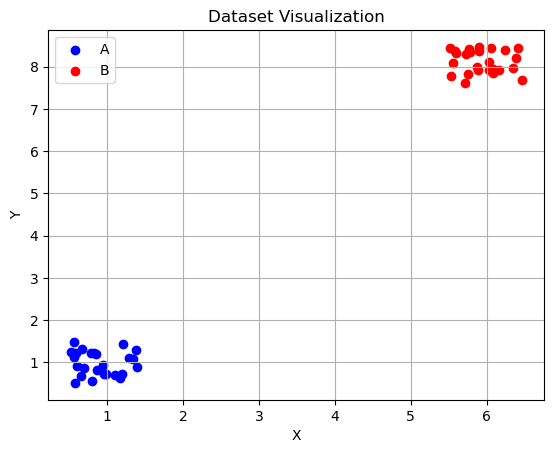

In [33]:
# TEST 1 with no noise
dataset = generate_dataset()

shuffle(dataset)
split = int(0.7 * len(dataset))
train_data = dataset[:split]
test_data = dataset[split:]

k = 3
acc = accuracy(test_data, train_data, k)
print(f"Accuracy with k={k}: {acc * 100:.2f}%")
plot_dataset(dataset)

Accuracy with k=3: 88.89%


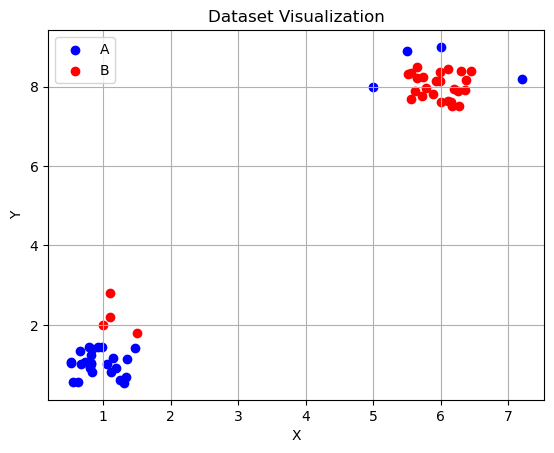

In [35]:
# TEST 2 with noise
dataset = generate_dataset()
dataset += [ ([1.0, 2.0], 'B'), ([1.5, 1.8], 'B'), ([5.0, 8.0], 'A'), ([6.0, 9.0], 'A'),
             ([1.1, 2.2], 'B'), ([1.1, 2.8], 'B'), ([5.5, 8.9], 'A'), ([7.2, 8.2], 'A') ] # introduced noise into the data

shuffle(dataset)
split = int(0.7 * len(dataset))
train_data = dataset[:split]
test_data = dataset[split:]


k = 3
acc = accuracy(test_data, train_data, k)
print(f"Accuracy with k={k}: {acc * 100:.2f}%")
plot_dataset(dataset)

# Result
- it is found out that, until the dataset is clean and contains data points nearly clustered then the accuracy is 100%
- but when noise is introduced, the accuracy dips sharply